In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


d:\DeepLearning\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0


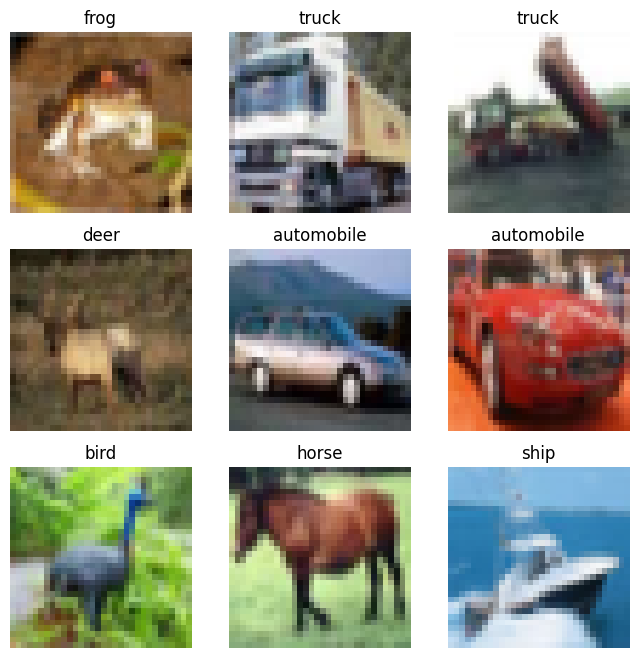

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [6]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [7]:
model = models.Sequential([
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu',
                  input_shape=(32,32,3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


d:\DeepLearning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 24ms/step - accuracy: 0.4141 - loss: 1.6117 - val_accuracy: 0.5156 - val_loss: 1.3375
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5220 - loss: 1.3405 - val_accuracy: 0.5671 - val_loss: 1.1981
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.5576 - loss: 1.2401 - val_accuracy: 0.5910 - val_loss: 1.1529
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.5842 - loss: 1.1733 - val_accuracy: 0.6203 - val_loss: 1.0636
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6014 - loss: 1.1265 - val_accuracy: 0.6337 - val_loss: 1.0347
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6131 - loss: 1.0905 - val_accuracy: 0.6330 - val_loss: 1.0650
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.6277 - loss: 1.0578 - val_accuracy: 0.6497 - val_loss: 1.0032
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6340 -

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6687 - loss: 0.9679
Test accuracy: 0.6686999797821045


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


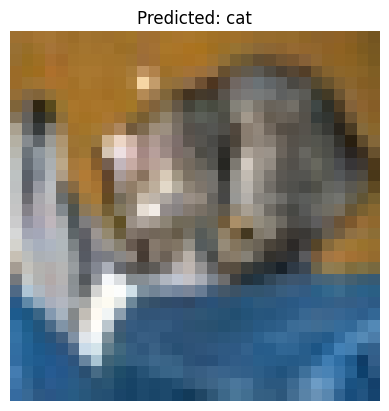

In [11]:
predictions = model.predict(x_test)

plt.imshow(x_test[0])
plt.title("Predicted: " +
          class_names[np.argmax(predictions[0])])
plt.axis('off')
plt.show()


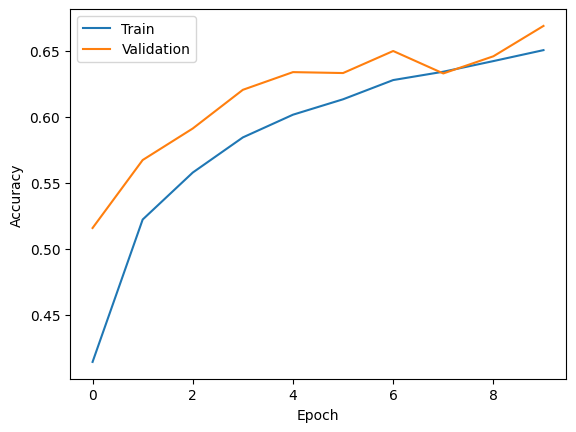

In [12]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
